<a href="https://colab.research.google.com/github/DHYANAJPATEL/ML_PROJECT/blob/main/Patel_Dhyana_Jigar_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

In [ ]:
#For preprocessing of data
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Models for dataset
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
#Evaluation Matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the datasets
Rossmanndata = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')


<ipython-input-6-b0b7b75f6102>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Rossmanndata = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')


In [ ]:
Rossmanndata.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
Storedata = pd.read_csv('/content/drive/MyDrive/store.csv')

In [ ]:
Storedata.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#Dimensions of both the dataset
print(f'Rossmanndata = {Rossmanndata.shape[0]} Rows , {Rossmanndata.shape[1]} columns.')
print(f'Storedata = {Storedata.shape[0]} Rows , {Storedata.shape[1]} columns.')

Rossmanndata = 1017209 Rows , 9 columns.
Storedata = 1115 Rows , 10 columns.


In [ ]:
Rossmanndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
Storedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Creating a dataframe
dframe = pd.merge(Rossmanndata, Storedata, how='left', on='Store')

In [ ]:
#Splitting into d m and y
dframe['year'] = dframe['Date'].apply(lambda x : x.split('-')[0])
dframe['month'] = dframe['Date'].apply(lambda x : x.split('-')[1])
dframe['date'] = dframe['Date'].apply(lambda x : x.split('-')[2])

In [ ]:
#deleting d column
del dframe['Date']

In [ ]:
#Result after deleting
result = dframe.groupby(['month'],as_index=False).agg({'Sales':"sum"})
print(result)

   month      Sales
0     01  566728724
1     02  528734410
2     03  599831906
3     04  575895295
4     05  569248217
5     06  578112775
6     07  595059205
7     08  361791202
8     09  342570131
9     10  351878728
10    11  369498877
11    12  433831153


In [ ]:
#putting 0 in all the null values of the dataframe
dframe['Promo2SinceWeek'].fillna(0, inplace = True)
dframe['Promo2SinceYear'].fillna(0, inplace = True)
dframe['PromoInterval'].fillna(0, inplace = True)

In [ ]:
dframe.loc[dframe['StateHoliday'] == '0' , 'StateHoliday']=0

In [ ]:
dframe['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
#Checking the dataframe after changes
dframe.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07,31


In [ ]:
#Statistical analysis of the dataframe
dframe.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,5.000000e+01,2.015000e+03


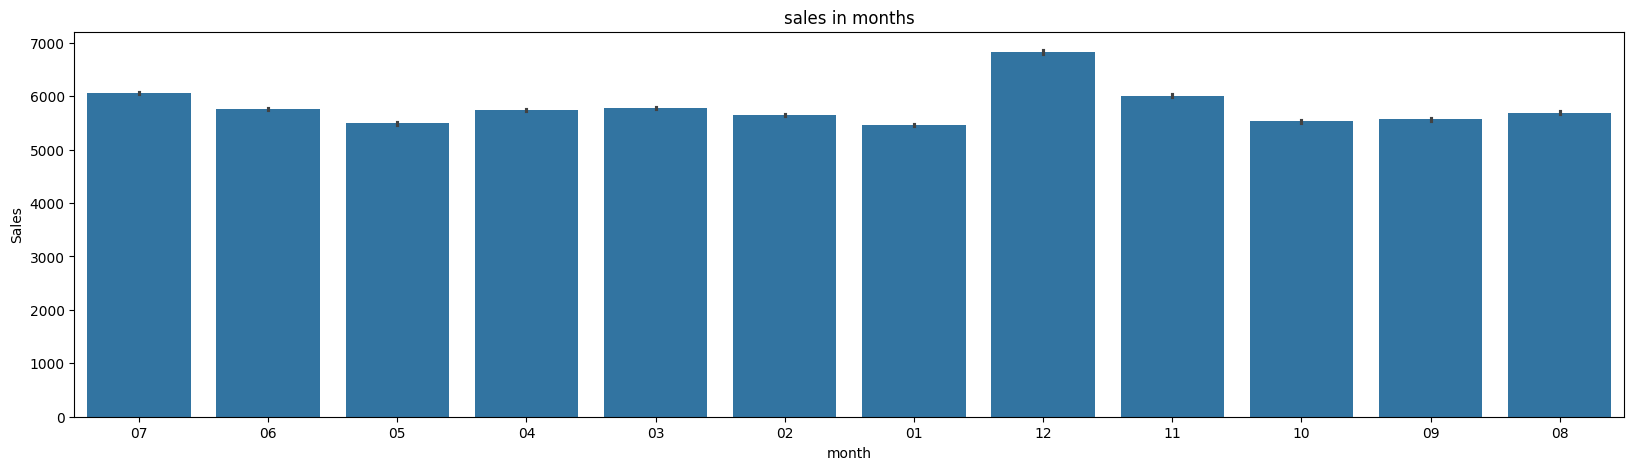

In [ ]:
#Visulaization of dataframe
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=dframe , x='month' , y = 'Sales' , ax=ax)
ax.set(title = 'sales in months')
plt.show()

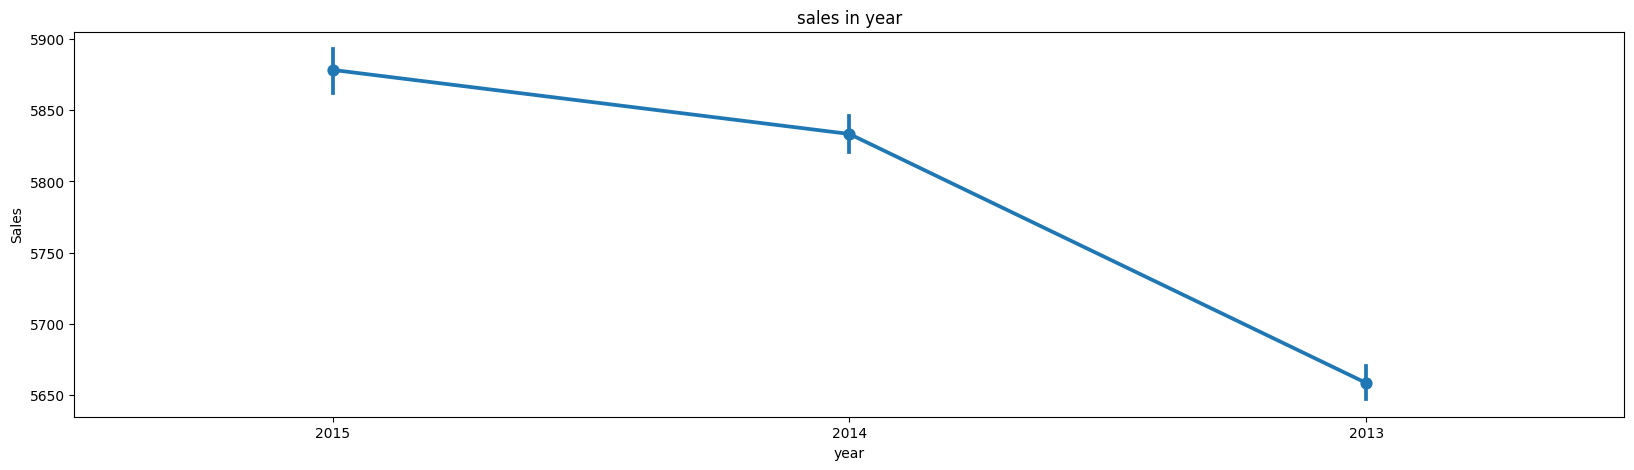

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
sns.pointplot(data=dframe , x='year' , y = 'Sales' , ax=ax)
ax.set(title = 'sales in year')
plt.show()

In [ ]:
#Preprocessing and looking for  null values
print(dframe['CompetitionDistance'].isna().sum())
print(dframe['CompetitionOpenSinceMonth'].isna().sum())
print(dframe['CompetitionOpenSinceYear'].isna().sum())

2642
323348
323348


In [ ]:
#Missing values handling phase
dframe['CompetitionDistance'].fillna(dframe['CompetitionDistance'].median(), inplace = True)
dframe['CompetitionOpenSinceMonth'].fillna(dframe['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
dframe['CompetitionOpenSinceYear'].fillna(dframe['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
#Dropping some columns which do not contribute majorly
dframe.drop(['Promo2SinceWeek' ,'Promo2SinceYear' , 'PromoInterval'], axis = 1 , inplace = True)

In [ ]:
# Rechecking the dataframe dframe for null values
dframe.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
year                         0
month                        0
date                         0
dtype: int64

In [ ]:
#Checking the dframe information
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

In [ ]:
#Handling the outliers of the datframe
continuous_answer = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'DayOfWeek',]

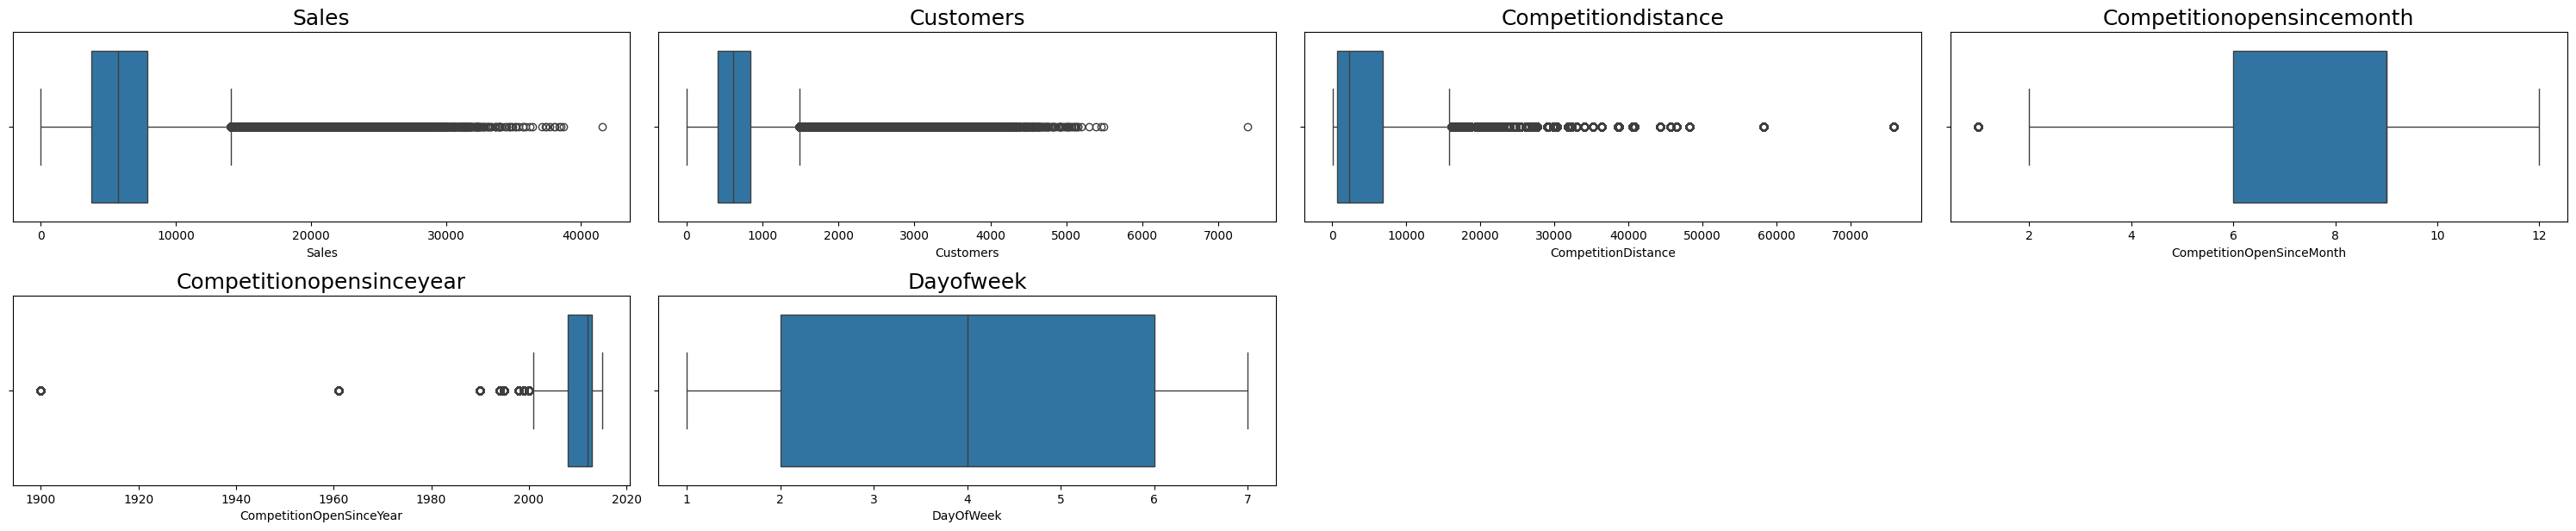

In [ ]:
#Showing the outliers through a boxplot graph
plt.figure(figsize = (30,15))
for n, column in enumerate(continuous_answer):
  plt.subplot(5,4,n+1)
  sns.boxplot(x =column, data = dframe).set_title(f'{column.title()}', fontsize = 18)
  plt.tight_layout()

In [ ]:
# IQR Technique for outliers
def iqr2_treating_outliers(data):
  # now calculating first and last quartile
  q1,q3 = np.percentile(data, [25,75])
  # now calculating interquartile range
  IQR = q3-q1
  # now the bounds
  Lowerrbound = q1-(1.5*IQR)
  Upperrbound = q3+(1.5*IQR)
  # now the outliers
  Outliers = [x for x in data if x<Lowerrbound or x>Upperrbound]
  # replacement with the nearest quartile
  datatreating = [q1 if x<Lowerrbound
                    else q3 if x>Upperrbound
                    else x for x in data]
  inttreatdata = [int (absolute) for absolute in datatreating]

  return inttreatdata

In [ ]:
for column in continuous_answer:
  dframe[column] = iqr2_treating_outliers(dframe[column])

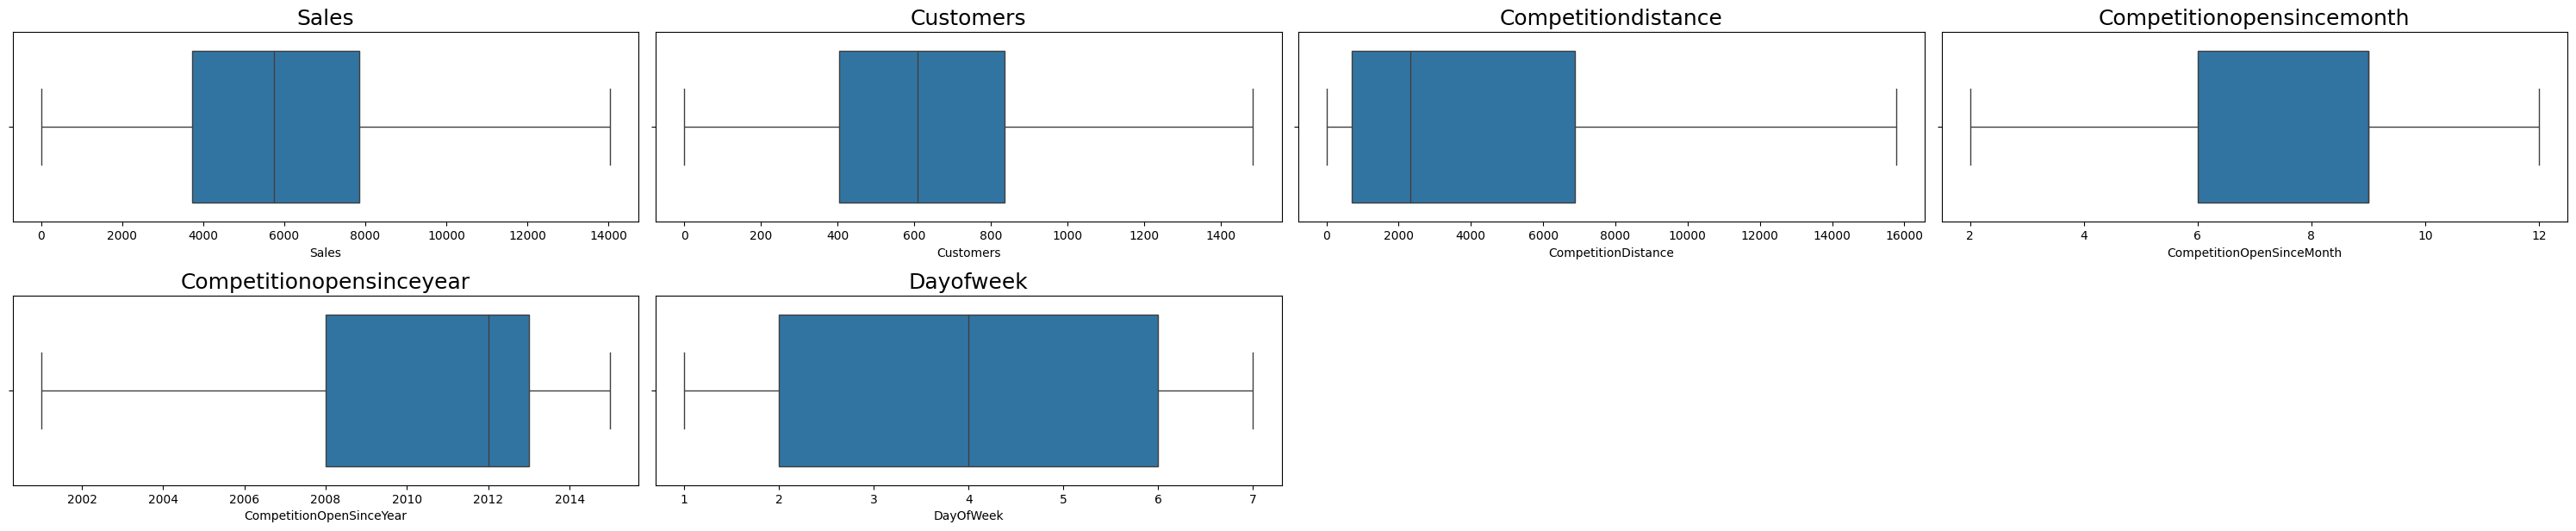

In [ ]:
#Checking outliers after the above process
plt.figure(figsize = (30,15))
for n, column in enumerate(continuous_answer):
  plt.subplot(5,4,n+1)
  sns.boxplot(x =column, data = dframe).set_title(f'{column.title()}', fontsize = 18)
  plt.tight_layout()

In [ ]:
#Getting information of the dataframe
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Sales                      1017209 non-null  int64 
 3   Customers                  1017209 non-null  int64 
 4   Open                       1017209 non-null  int64 
 5   Promo                      1017209 non-null  int64 
 6   StateHoliday               1017209 non-null  object
 7   SchoolHoliday              1017209 non-null  int64 
 8   StoreType                  1017209 non-null  object
 9   Assortment                 1017209 non-null  object
 10  CompetitionDistance        1017209 non-null  int64 
 11  CompetitionOpenSinceMonth  1017209 non-null  int64 
 12  CompetitionOpenSinceYear   1017209 non-null  int64 
 13  Promo2                     

In [ ]:
#Changing value from string to the integer
dframe['StoreType'] = np.where(dframe['StoreType'] == 'a',0,dframe['StoreType'])
dframe['StoreType'] = np.where(dframe['StoreType'] == 'b',1,dframe['StoreType'])
dframe['StoreType'] = np.where(dframe['StoreType'] == 'c',2,dframe['StoreType'])
dframe['StoreType'] = np.where(dframe['StoreType'] == 'd',3,dframe['StoreType'])

In [ ]:
#Checking the datframe for unique values
dframe['StoreType'].unique()

array([2, 0, 3, 1], dtype=object)

In [ ]:
#Changing string too integer
dframe['Assortment'] = np.where(dframe['Assortment'] == 'a',0,dframe['Assortment'])
dframe['Assortment'] = np.where(dframe['Assortment'] == 'b',1,dframe['Assortment'])
dframe['Assortment'] = np.where(dframe['Assortment'] == 'c',2,dframe['Assortment'])

In [ ]:
dframe['Assortment'].unique ()

array([0, 2, 1], dtype=object)

In [ ]:
#onehotencoding
# one Hot coding
dframe.loc[dframe['StateHoliday'] == '0' , 'StateHoliday']=0
dframe['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
#oneHotenCoding
dframe = pd.get_dummies(dframe,columns=['StateHoliday'],drop_first= True)

In [ ]:
# Changing  Object into Integers
dframe['date'] = dframe['date'].astype(int)
dframe['year'] = dframe['year'].astype(int)
dframe['StoreType'] = dframe['StoreType'].astype(int)
dframe['Assortment'] = dframe['Assortment'].astype(int)
dframe['month'] = dframe['month'].astype(int)

In [ ]:
#Rechecking the whole dataframe info
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Store                      1017209 non-null  int64
 1   DayOfWeek                  1017209 non-null  int64
 2   Sales                      1017209 non-null  int64
 3   Customers                  1017209 non-null  int64
 4   Open                       1017209 non-null  int64
 5   Promo                      1017209 non-null  int64
 6   SchoolHoliday              1017209 non-null  int64
 7   StoreType                  1017209 non-null  int64
 8   Assortment                 1017209 non-null  int64
 9   CompetitionDistance        1017209 non-null  int64
 10  CompetitionOpenSinceMonth  1017209 non-null  int64
 11  CompetitionOpenSinceYear   1017209 non-null  int64
 12  Promo2                     1017209 non-null  int64
 13  year                       1017209 non-nul

In [ ]:
#Manipulate and Select
number_values = list(dframe.describe().columns)
number_values

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'year',
 'month',
 'date',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

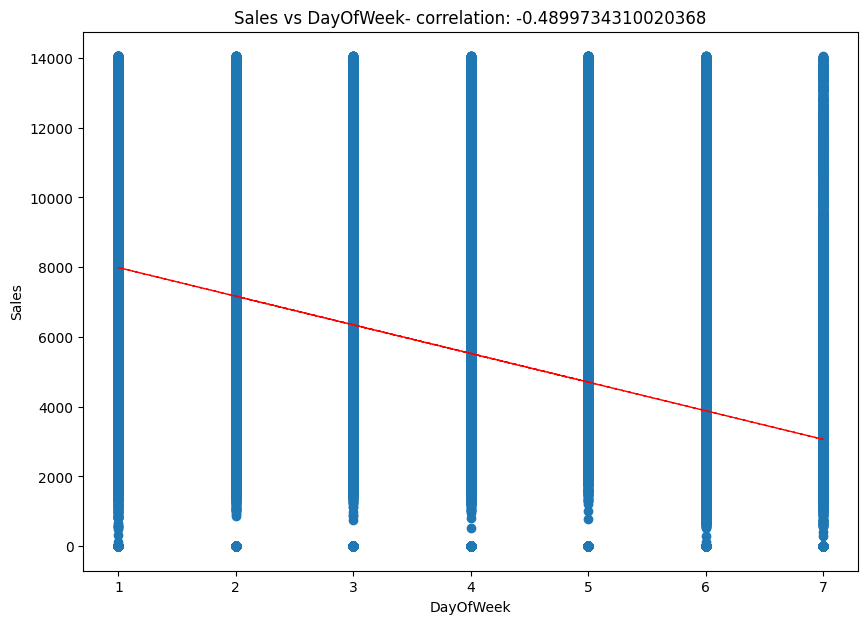

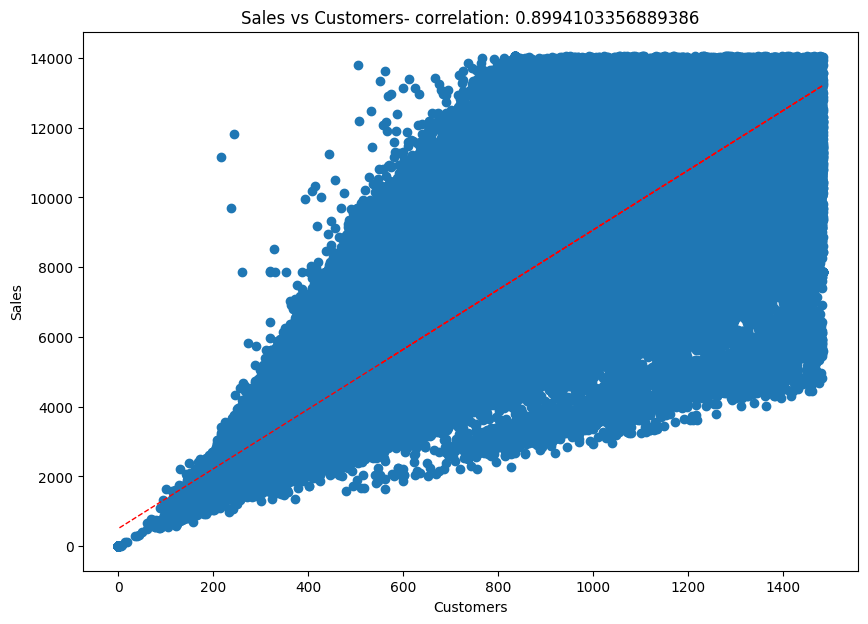

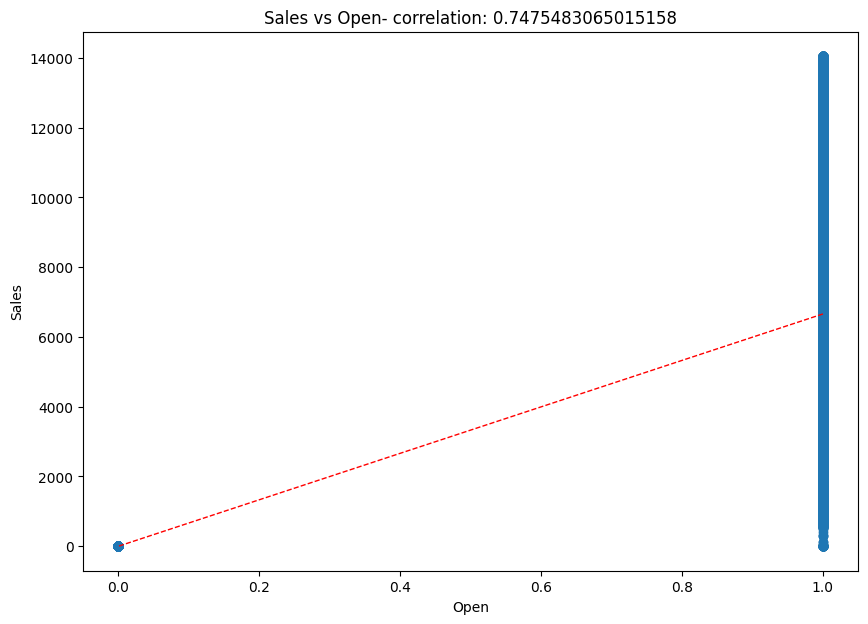

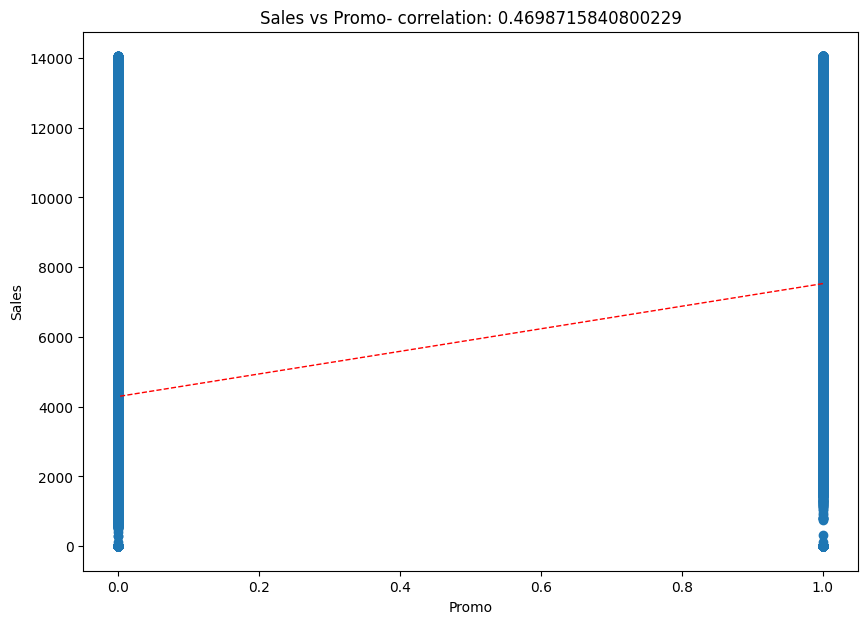

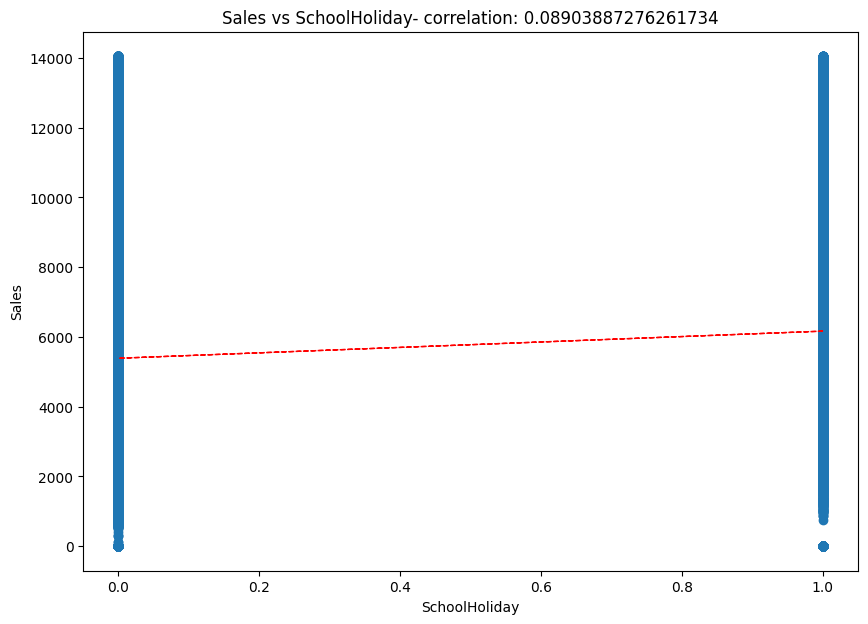

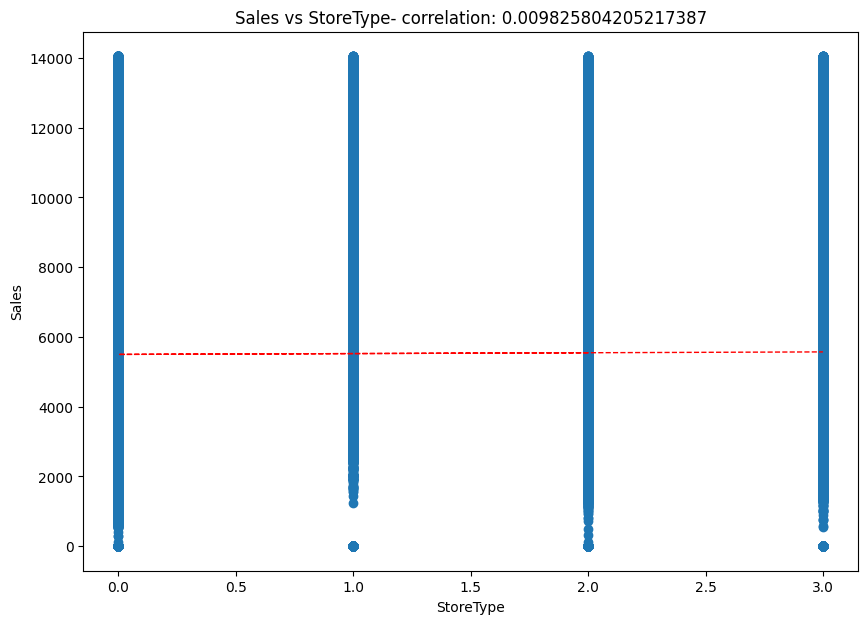

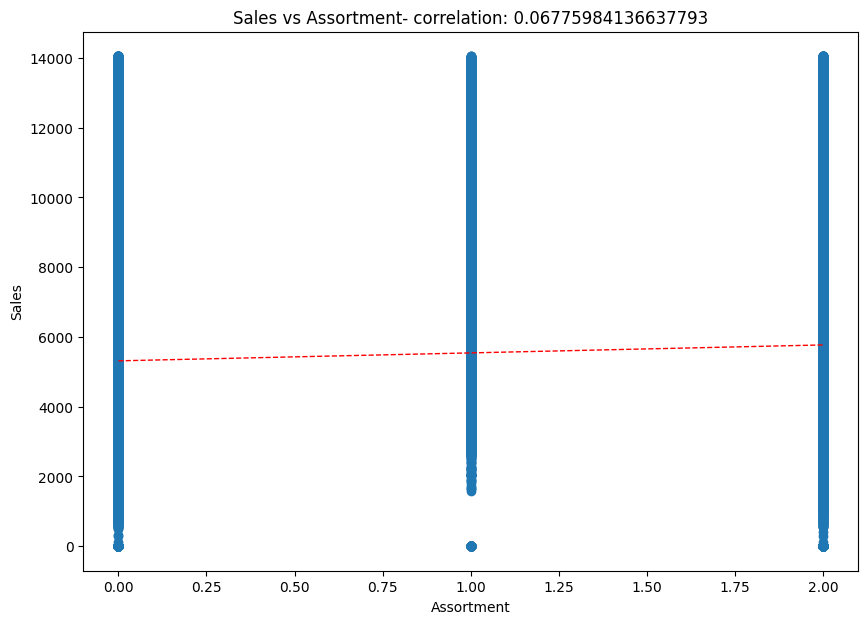

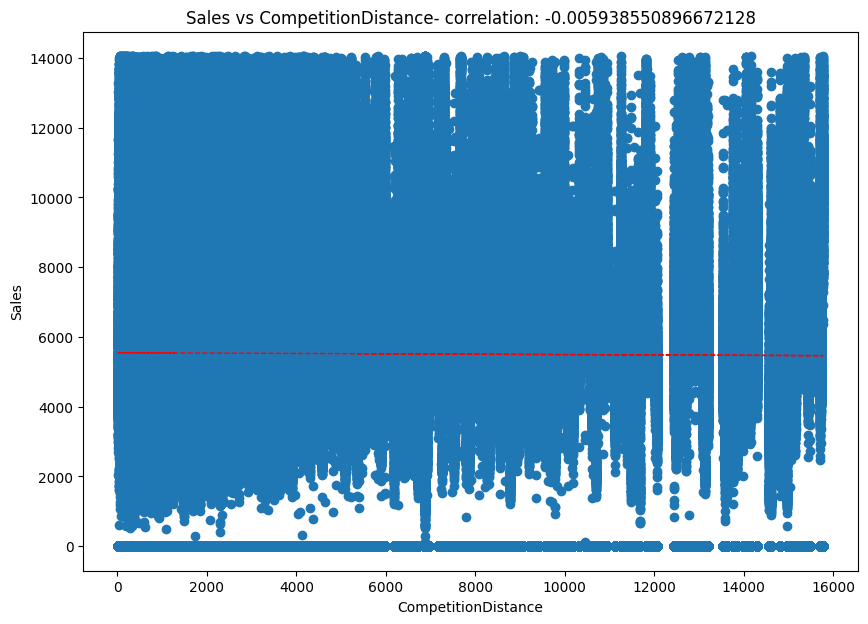

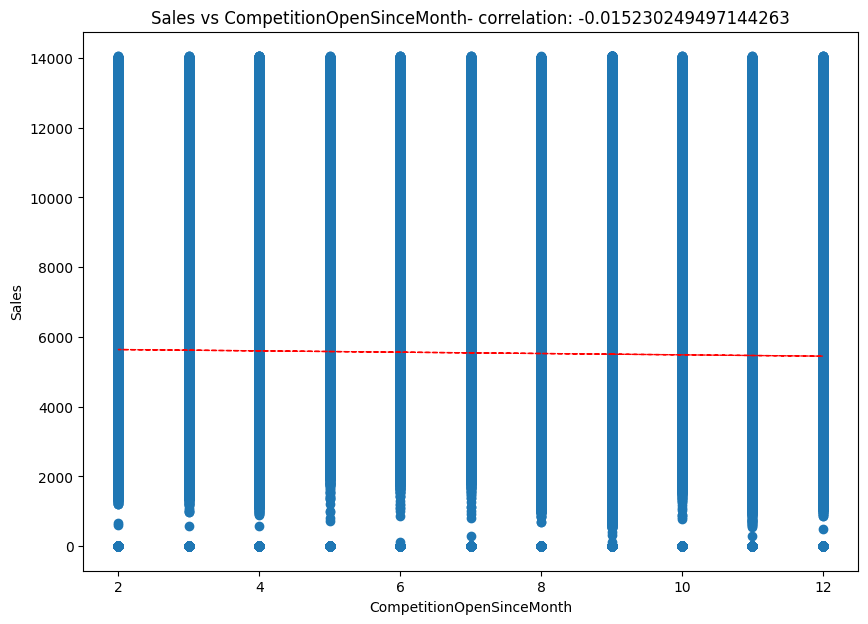

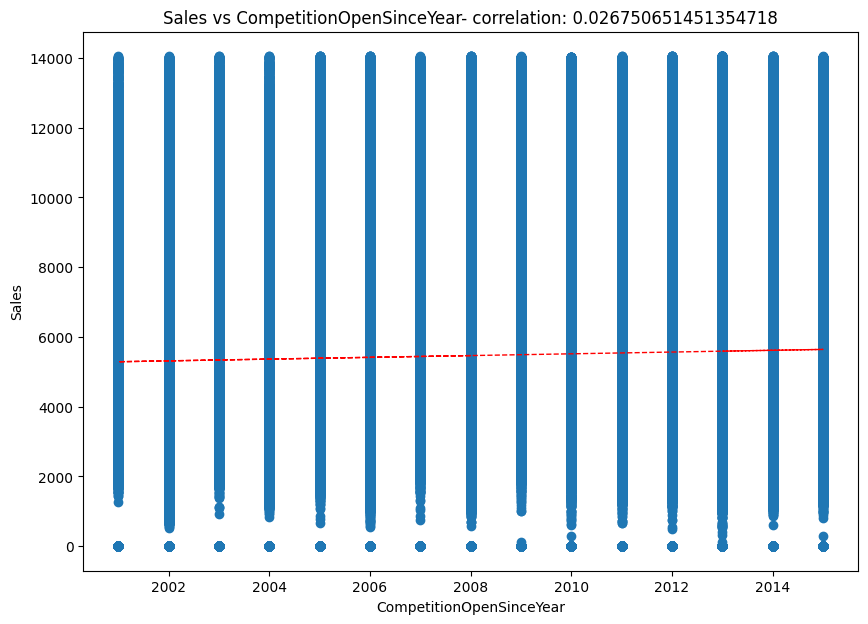

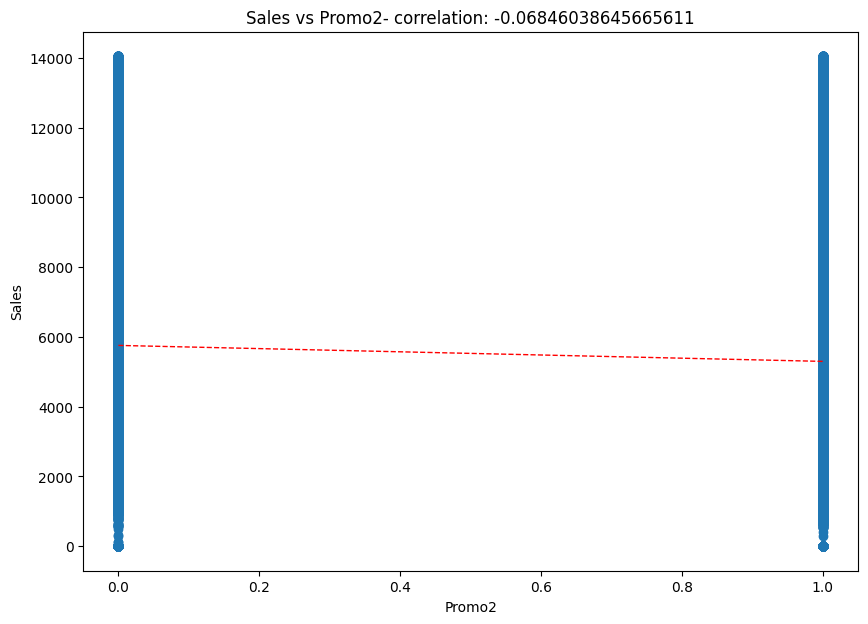

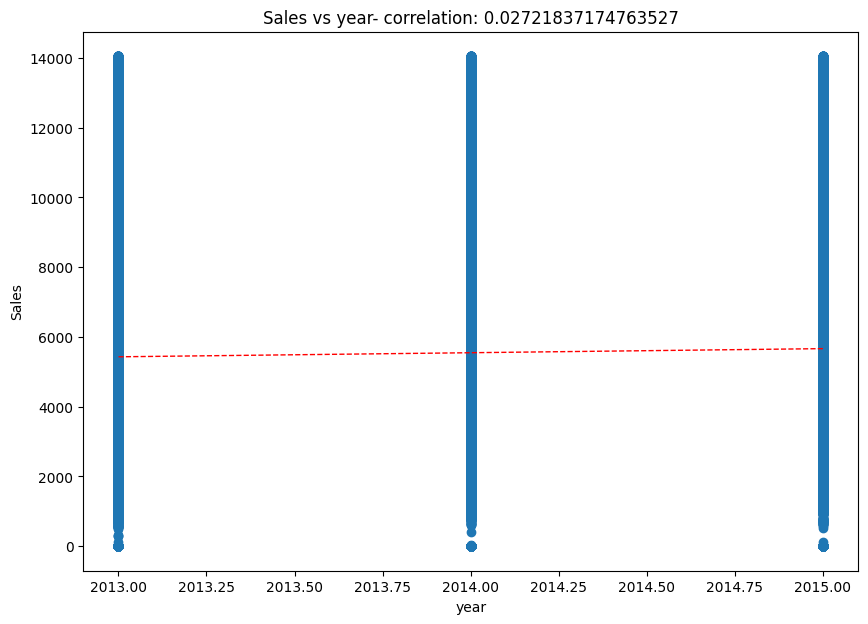

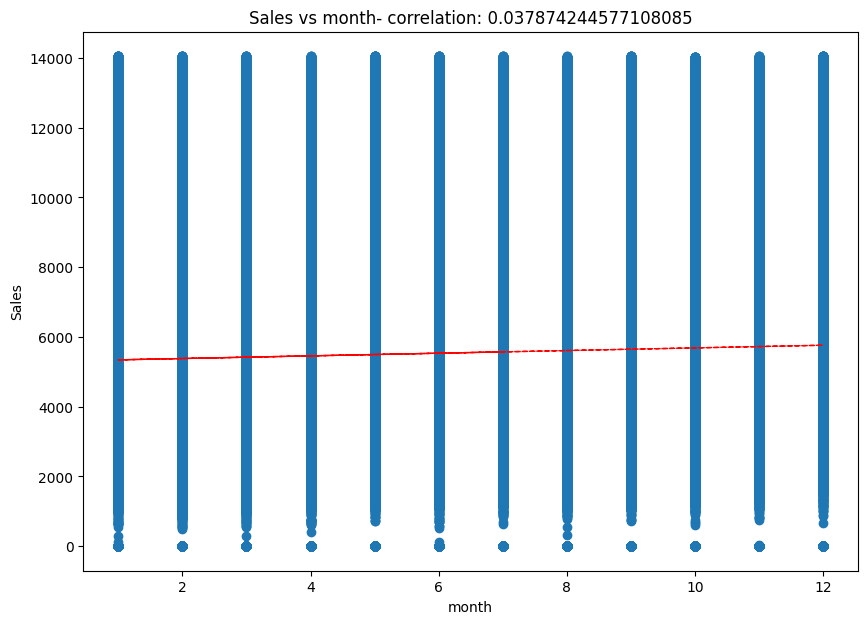

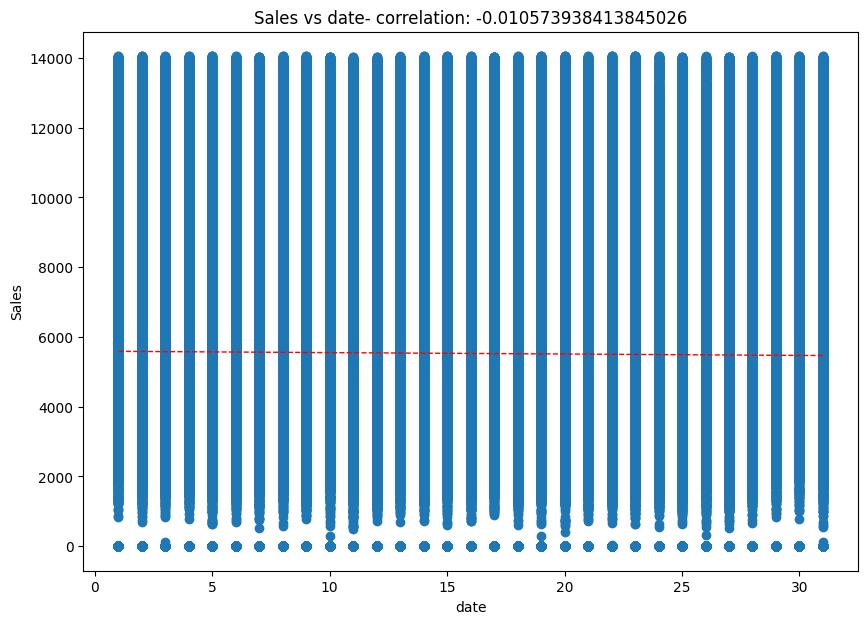

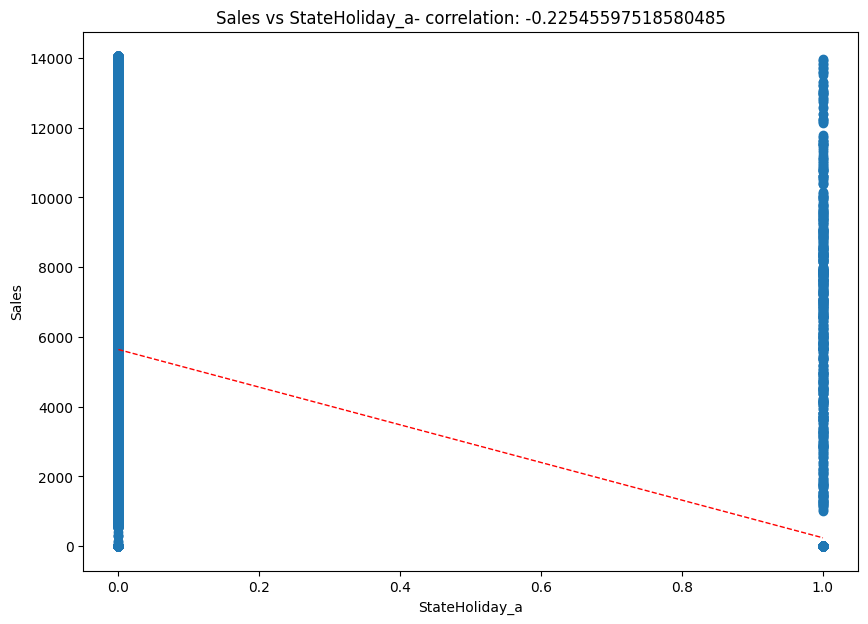

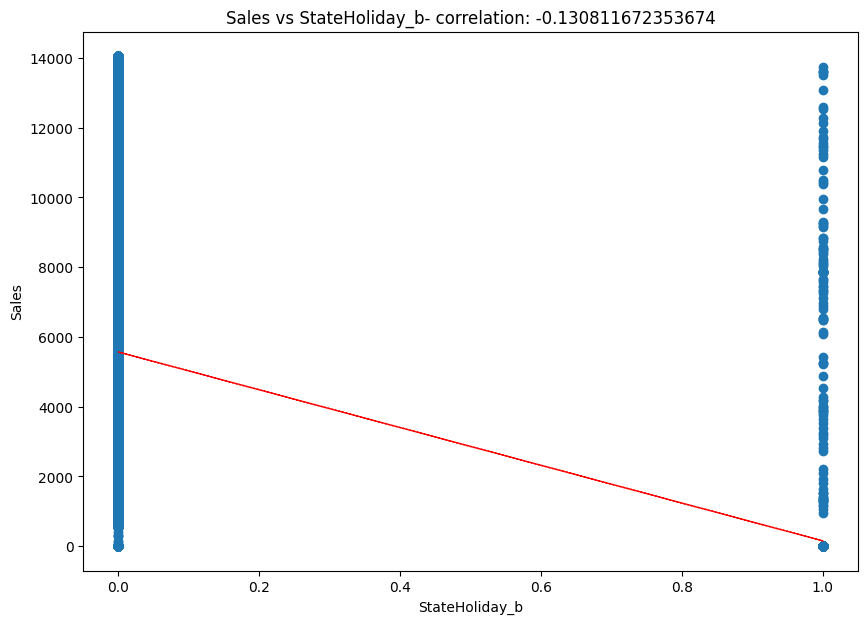

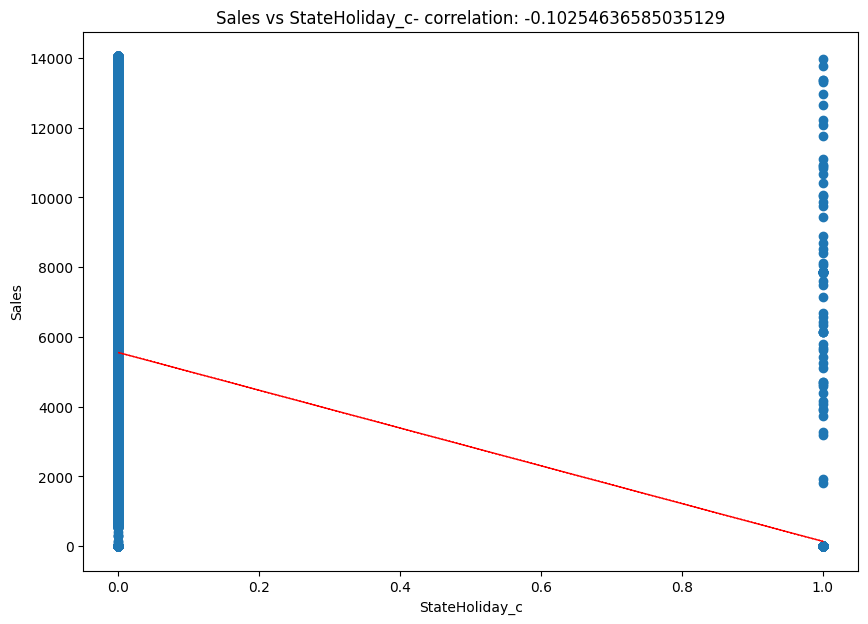

In [ ]:
#Correlation
for col in number_values:
  if col not in ['Sales', 'Store']:
   fig = plt.figure(figsize = (10,7))
   ax = fig.gca()
   feature = dframe[col]
   label = dframe['Sales']
   Correlationcheck = feature.corr(label)
   plt.scatter (x= feature , y = label)
   plt.xlabel(col)
   plt.ylabel('Sales')
   ax.set_title('Sales vs ' + col + '- correlation: ' + str(Correlationcheck))
   z = np.polyfit(dframe[col], dframe['Sales'], 1)
   y_hat = np.poly1d(z)(dframe[col])

   plt.plot(dframe[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
#Using inflation variance
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  viff = pd.DataFrame()
  viff["variable"] = X.columns
  viff["VIF"] = [variance_inflation_factor(X.values ,i) for i in range (X.shape[1])]

  return(viff)

In [ ]:
calc_vif(dframe[[i for i in dframe.describe().columns if i not in ['Sales']]])

,variable,VIF
0,Store,4.023049
1,DayOfWeek,8.601597
2,Customers,10.503166
3,Open,17.835485
4,Promo,2.078084
5,SchoolHoliday,1.347443
6,StoreType,2.024900
7,Assortment,2.075134
8,CompetitionDistance,2.248656
9,CompetitionOpenSinceMonth,9.642168


In [ ]:
# high multicollinearity columns
calc_vif(dframe[[i for i in dframe.describe().columns if i not in ['Sales', 'Open','CompetitionOpenSinceYear','year']]])

,variable,VIF
0,Store,3.709446
1,DayOfWeek,4.818818
2,Customers,4.642129
3,Promo,2.012838
4,SchoolHoliday,1.336920
5,StoreType,1.978876
6,Assortment,2.036314
7,CompetitionDistance,2.117148
8,CompetitionOpenSinceMonth,7.535913
9,Promo2,1.970803


In [ ]:
#Transforming
#Transformation of data
indendent_var =dframe.columns.drop(['Sales', 'Open','CompetitionOpenSinceYear','year'])

In [ ]:
indendent_var

Index(['Store', 'DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'Promo2', 'month', 'date',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [ ]:
dependent_var = dframe['Sales']

In [ ]:
#Name
X = dframe[indendent_var]
y  = dframe[['Sales']]

In [ ]:
#Scaling of data of dataframe
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [ ]:
#training testing splitting
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((813767, 15), (203442, 15), (813767, 1), (203442, 1))

In [ ]:
#Ml model implementation
X_train_with_coumns = X_train

In [ ]:
#evaluation matric scorecert
from sklearn import metrics
def regression_metric (true, predicted):
  Mae = metrics.mean_absolute_error(true, predicted)
  Mse = metrics.mean_squared_error(true, predicted)
  Rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true, predicted)
  Mape = mean_absolute_percentage_error(true,predicted)*100
  Accuracy = 100 - Mape
  print('MAE:', Mae)
  print('MSE:', Mse)
  print('RMSE:', Rmse)
  print('MAPE',Mape)
  print('R2 Square', r2_square)
  print('Accuracy ', Accuracy ,'%')

In [ ]:
#Model 1- Linear Regression
from sklearn.linear_model import LinearRegression
Model1 = LinearRegression()
# Fit the Algorithm
Model1.fit(X_train , y_train)

LinearRegression()

In [ ]:
#Prediction using Linear Regression
Y_pred_train = Model1.predict(X_train)
Y_pred_test = Model1.predict(X_test)

In [ ]:
#Score of Linear Regression
Model1.score(X_train, y_train)

0.8524370862266215

In [ ]:
Model1.coef_

array([[-1.17441117e-01, -6.40763638e+01,  7.98407526e+00,
         9.46357585e+02,  5.38189739e+01,  2.17422579e+02,
         1.10917811e+02,  6.27572034e-02, -7.32696557e+00,
         2.25497288e+02,  1.20987692e+01,  8.70559110e-01,
        -8.69872293e+02, -1.03922261e+03, -6.11283821e+02]])

In [ ]:
Model1.intercept_

array([78.93632094])

In [ ]:
#Evaluation of linear regression model
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)

Train set
_________________
MAE: 895.1654857295399
MSE: 1652936.0703503413
RMSE: 1285.6656137387906
MAPE 29.30921017184989
R2 Square 0.8268928978365112
Accuracy  70.69078982815012 %
Test set 
_________________
MAE: 892.7948540444015
MSE: 1644860.6766456033
RMSE: 1282.5212187896166
MAPE 29.196166093189273
R2 Square 0.8271154020674981
Accuracy  70.80383390681072 %


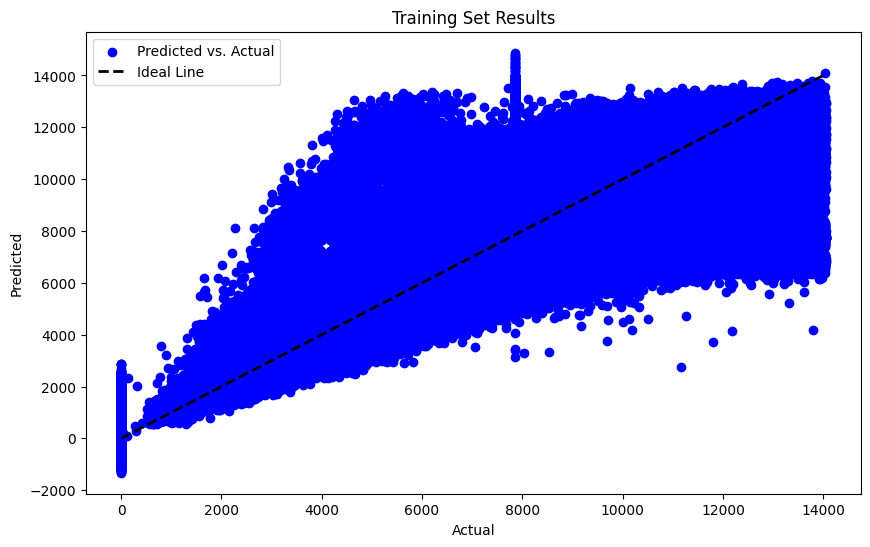

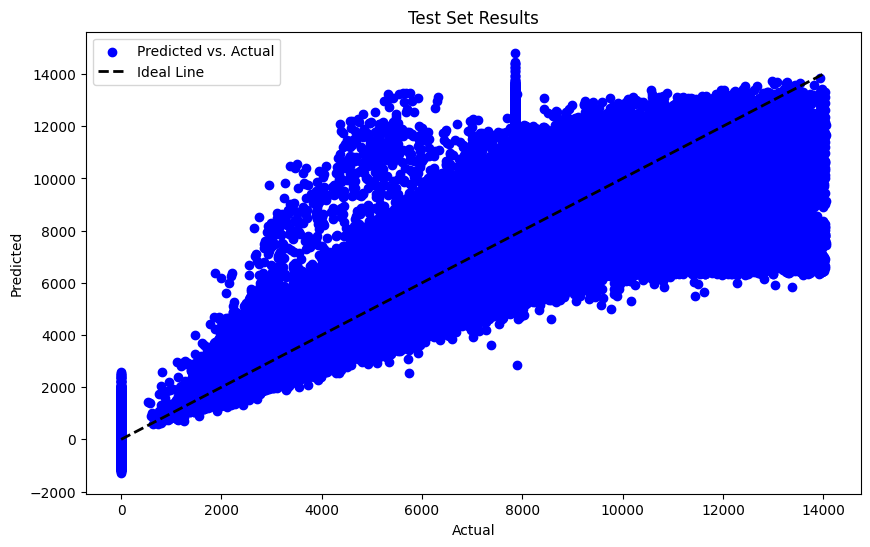

In [ ]:
import matplotlib.pyplot as plt

def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, c='blue', label='Predicted vs. Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Ideal Line')
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()

plot_results(y_train, Y_pred_train, 'Training Set Results')

plot_results(y_test, Y_pred_test, 'Test Set Results')


In [ ]:
# Cross Validation and  Hyperparameter tuning
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parmeter = {'alpha': [1e-15,1e-10,1e-6,1e-4,1e-1,1,10,20]}
lesso_regressor = GridSearchCV(lasso, parmeter , scoring = 'neg_mean_squared_error' , cv =3)
# Fit the Algorithm
lesso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.499e+11, tolerance: 6.086e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.486e+11, tolerance: 6.080e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.466e+11, tolerance: 6.065e

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-06, 0.0001, 0.1, 1, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [ ]:
#Prediction on the data
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)
print("The best fit alpha value is found out to be :" ,lesso_regressor.best_params_)
print("\nUsing ",lesso_regressor.best_params_, " the negative mean squared error is: ", lesso_regressor.best_score_)

Train set
_________________
MAE: 895.1654857295399
MSE: 1652936.0703503413
RMSE: 1285.6656137387906
MAPE 29.30921017184989
R2 Square 0.8268928978365112
Accuracy  70.69078982815012 %
Test set 
_________________
MAE: 892.7948540444015
MSE: 1644860.6766456033
RMSE: 1282.5212187896166
MAPE 29.196166093189273
R2 Square 0.8271154020674981
Accuracy  70.80383390681072 %
The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -1653050.3227717944


In [ ]:
#Ridgeregression
ridgee= Ridge()
parameters = {'alpha': [17], 'max_iter':[2]}
ridgee_reg = GridSearchCV(ridgee, parameters, scoring='neg_mean_squared_error', cv=3)
ridgee_reg.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [17], 'max_iter': [2]},
             scoring='neg_mean_squared_error')

In [ ]:
Y_train_ridge_pred = ridgee_reg.predict(X_train)
Y_test_ridge_pred = ridgee_reg.predict(X_test)

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)
print("The best fit alpha value is found  to be :" ,ridgee_reg.best_params_)
print("\nUsing ",ridgee_reg.best_params_, " the negative mean squared error is: ", ridgee_reg.best_score_)

Train set
_________________
MAE: 895.1654857295399
MSE: 1652936.0703503413
RMSE: 1285.6656137387906
MAPE 29.30921017184989
R2 Square 0.8268928978365112
Accuracy  70.69078982815012 %
Test set 
_________________
MAE: 892.7948540444015
MSE: 1644860.6766456033
RMSE: 1282.5212187896166
MAPE 29.196166093189273
R2 Square 0.8271154020674981
Accuracy  70.80383390681072 %
The best fit alpha value is found  to be : {'alpha': 17, 'max_iter': 2}

Using  {'alpha': 17, 'max_iter': 2}  the negative mean squared error is:  -1653050.6536696989


In [ ]:
#ElasticNet
enet= ElasticNet()
elastic = ElasticNet(alpha = 0.1 , l1_ratio = 0.5)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
Y_test_pred = elastic.predict(X_test)
Y_train_pred = elastic.predict(X_train)

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)

Train set
_________________
MAE: 895.1654857295399
MSE: 1652936.0703503413
RMSE: 1285.6656137387906
MAPE 29.30921017184989
R2 Square 0.8268928978365112
Accuracy  70.69078982815012 %
Test set 
_________________
MAE: 892.7948540444015
MSE: 1644860.6766456033
RMSE: 1282.5212187896166
MAPE 29.196166093189273
R2 Square 0.8271154020674981
Accuracy  70.80383390681072 %


In [ ]:
#Model 2- Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15)
tree.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=15)

In [ ]:
#Prediction using Decision tree
Y_pred_test_dtt = tree.predict(X_test)
Y_pred_train_dtt = tree.predict(X_train)

In [ ]:
#Score of Decision tree
print('Train set\n_________________')
regression_metric(Y_pred_train_dtt, y_train)

print('Test set \n_________________')
regression_metric(Y_pred_test_dtt , y_test)

Train set
_________________
MAE: 449.54378046791123
MSE: 549598.8446811046
RMSE: 741.349340514379
MAPE 6.531027568702502
R2 Square 0.9484040165172052
Accuracy  93.4689724312975 %
Test set 
_________________
MAE: 482.51328863268844
MSE: 622027.1822714412
RMSE: 788.6869989238071
MAPE 7.046682264231925
R2 Square 0.9413388875332089
Accuracy  92.95331773576808 %


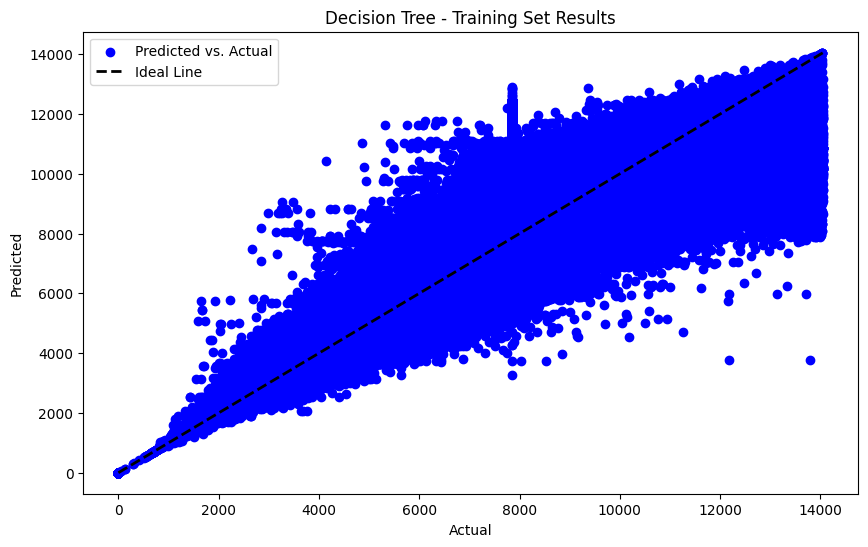

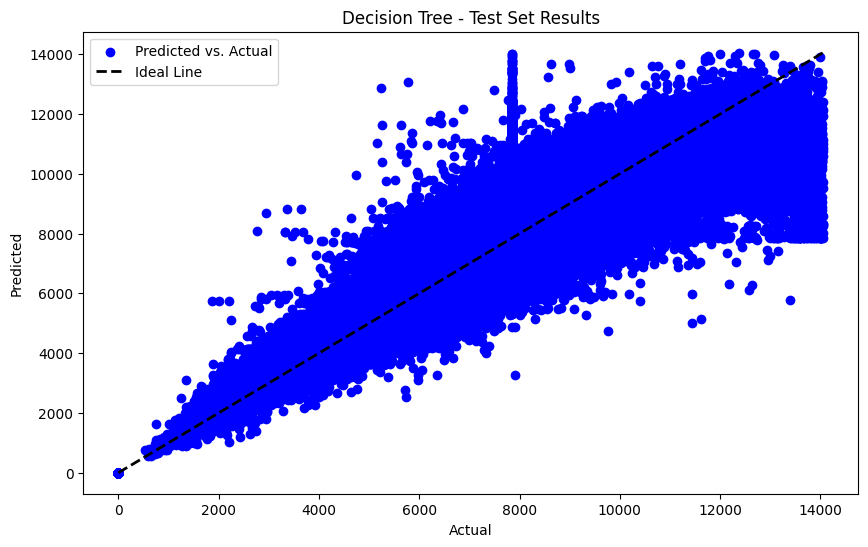

In [ ]:
import matplotlib.pyplot as plt

def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, c='blue', label='Predicted vs. Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Ideal Line')
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()


plot_results(y_train, Y_pred_train_dtt, 'Decision Tree - Training Set Results')


plot_results(y_test, Y_pred_test_dtt, 'Decision Tree - Test Set Results')


In [ ]:
# Cross Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
tree= DecisionTreeRegressor()
parameter = {'max_depth': [18], 'min_samples_leaf': [5], 'min_samples_split': [3]}
dtt_reg = GridSearchCV(tree , parameter,scoring='neg_mean_squared_error', cv=3)
dtt_reg.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [18], 'min_samples_leaf': [5],
                         'min_samples_split': [3]},
             scoring='neg_mean_squared_error')

In [ ]:
#Prediction on the model
Y_train_dtt_grid = dtt_reg.predict(X_train)
Y_test_dtt_grid =  dtt_reg.predict (X_test)

In [ ]:
#Scores
print('Train set\n_________________')
regression_metric(Y_train_dtt_grid, y_train)
print('Test set \n_________________')
regression_metric(Y_test_dtt_grid, y_test)
print("The best fit is :" ,ridgee_reg.best_params_)

Train set
_________________
MAE: 347.0661363548093
MSE: 371134.52985610056
RMSE: 609.2081170307077
MAPE 5.021962777916122
R2 Square 0.9657322564659774
Accuracy  94.97803722208388 %
Test set 
_________________
MAE: 406.27126901262363
MSE: 496690.6687679005
RMSE: 704.7628457629563
MAPE 5.921975485416816
R2 Square 0.9539132804425688
Accuracy  94.07802451458318 %
The best fit is : {'alpha': 17, 'max_iter': 2}


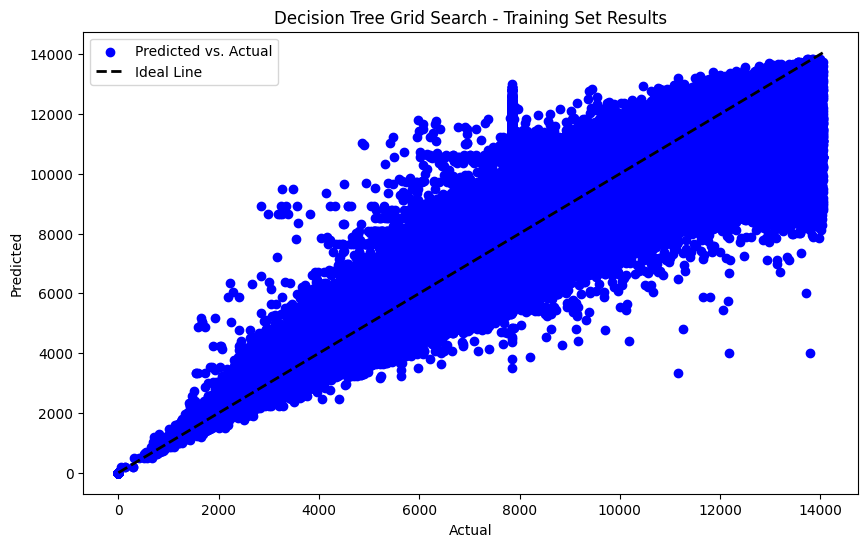

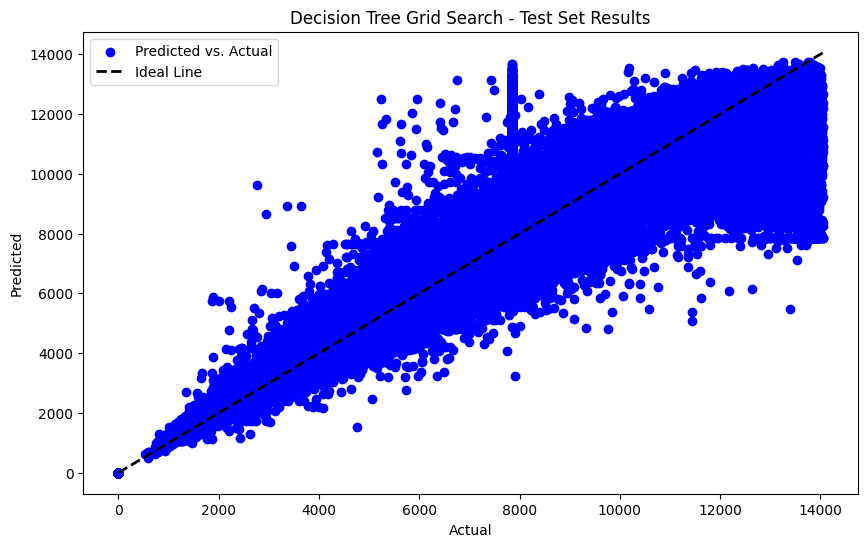

In [ ]:
import matplotlib.pyplot as plt

def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, c='blue', label='Predicted vs. Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Ideal Line')
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()



plot_results(y_train, Y_train_dtt_grid, 'Decision Tree Grid Search - Training Set Results')


plot_results(y_test, Y_test_dtt_grid, 'Decision Tree Grid Search - Test Set Results')


In [ ]:
#Model 3 Random Forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
randfor = RandomForestRegressor (n_estimators=100, max_depth=16)
# Fit the Algorithm
randfor.fit(X_train, y_train)

<ipython-input-89-6ca26560744b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randfor.fit(X_train, y_train)


RandomForestRegressor(max_depth=16)

In [ ]:
train_randfor_pre = randfor.predict(X_train)
test_randfor_pre = randfor.predict(X_test)

In [ ]:
print('Train set\n_________________')
regression_metric(train_randfor_pre, y_train)
print('Test set \n_________________')
regression_metric(test_randfor_pre, y_test)

Train set
_________________
MAE: 366.1254230111892
MSE: 372203.234927921
RMSE: 610.0846129250606
MAPE 5.284729508729232
R2 Square 0.9648752449602924
Accuracy  94.71527049127077 %
Test set 
_________________
MAE: 402.20774726520517
MSE: 449615.51191875676
RMSE: 670.5337515134916
MAPE 5.829058498643108
R2 Square 0.9573104569516279
Accuracy  94.1709415013569 %


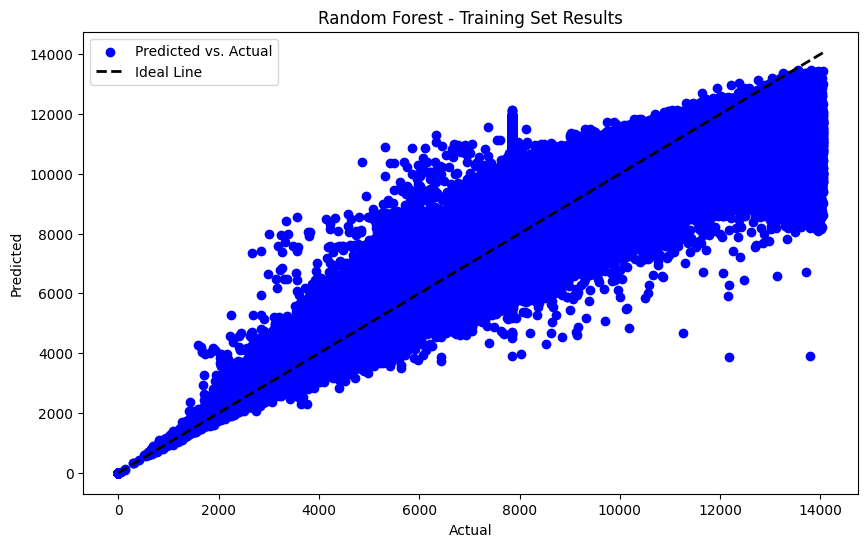

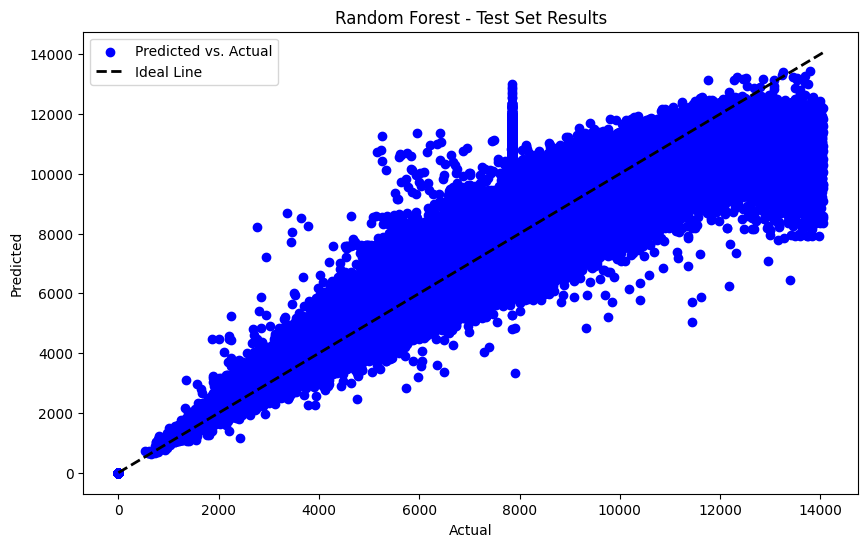

In [ ]:
import matplotlib.pyplot as plt

def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, c='blue', label='Predicted vs. Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Ideal Line')
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()




plot_results(y_train, train_randfor_pre, 'Random Forest - Training Set Results')


plot_results(y_test, test_randfor_pre, 'Random Forest - Test Set Results')


In [ ]:
randf = RandomForestRegressor()
parameters= {'n_estimators':[100], 'max_depth': [20], 'min_samples_leaf': [3]}
randf = GridSearchCV(randf, parameters, n_jobs= 1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
# Fit the Algorithm
randf.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, min_samples_leaf=3, n_estimators=100;, score=-357307.553 total time= 4.9min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, min_samples_leaf=3, n_estimators=100;, score=-365658.004 total time= 4.8min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, min_samples_leaf=3, n_estimators=100;, score=-370301.663 total time= 4.7min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [20], 'min_samples_leaf': [3],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
train_randf_pred = randf.predict(X_train)
test_randf_pred = randf.predict(X_test)

In [ ]:
print('Train set\n_________________')
regression_metric(train_randf_pred, y_train)
print('Test set \n_________________')
regression_metric(test_randf_pred, y_test)
print("The best fit alpha value is found out to be :" ,ridgee_reg.best_params_)

Train set
_________________
MAE: 256.01031756337477
MSE: 211261.0767157447
RMSE: 459.63145749148276
MAPE 3.704940918079083
R2 Square 0.9804373355450072
Accuracy  96.29505908192091 %
Test set 
_________________
MAE: 330.96511845498145
MSE: 345232.2008889677
RMSE: 587.5646354989107
MAPE 4.81773769643433
R2 Square 0.9677751637294165
Accuracy  95.18226230356566 %
The best fit alpha value is found out to be : {'alpha': 17, 'max_iter': 2}


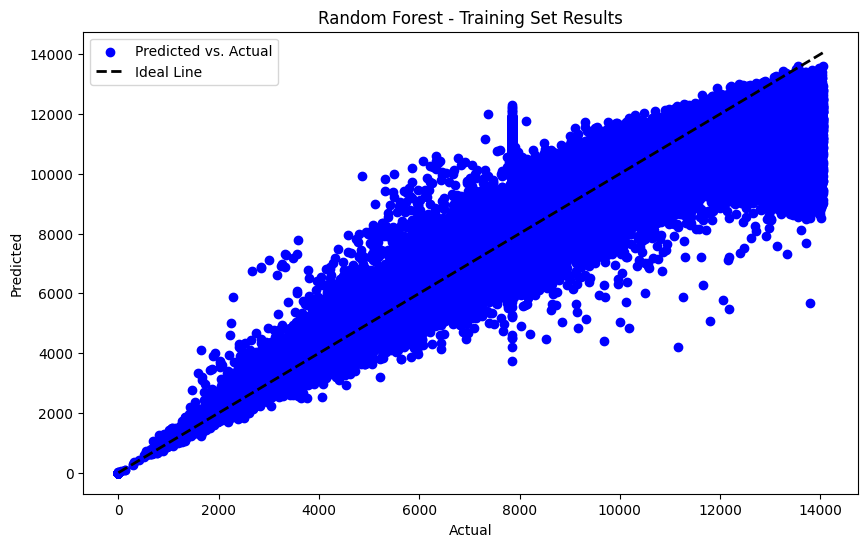

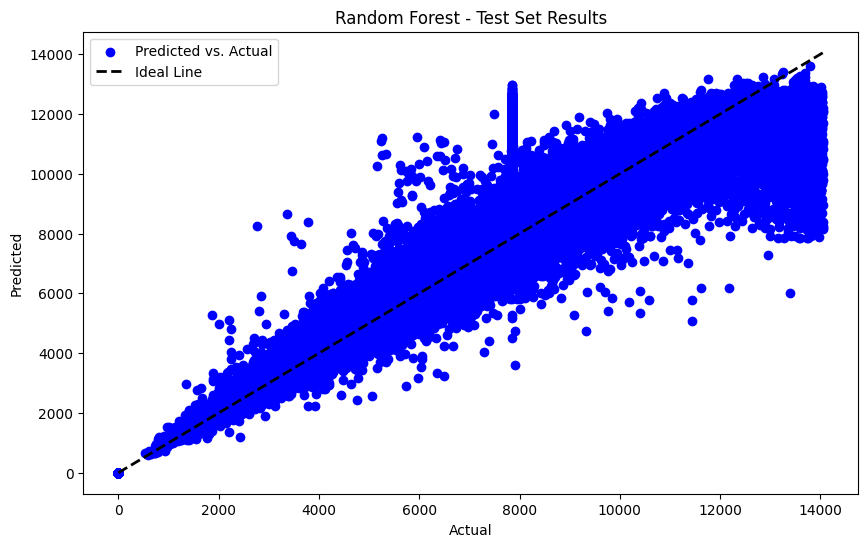

In [ ]:
import matplotlib.pyplot as plt

def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, c='blue', label='Predicted vs. Actual')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label='Ideal Line')
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()


plot_results(y_train, train_randf_pred, 'Random Forest - Training Set Results')


plot_results(y_test, test_randf_pred, 'Random Forest - Test Set Results')

In [ ]:
#Table
reg_metrics = ['Linear_regression', 'Decision_tree','Random_forest']
MAE_reg = [892.79,406.27 , 330.96]
MSE_reg = [1644860,496690,345232]
RMSE_reg = [1282.52,704.76,587.56]
MAPE_reg = [29.19,5.92, 4.81]
r2_reg = [0.82,0.95,0.96]
accuracy_reg = [70,94,95]

data ={'Model':reg_metrics,
       'MAE':MAE_reg,
       'MSE':MSE_reg,
       'RMSE':RMSE_reg,
       'MAPE':MAPE_reg,
       'R2':r2_reg ,
       'Accuracy':accuracy_reg}
Matric_score = pd.DataFrame(data)

In [ ]:
Matric_score

,Model,MAE,MSE,RMSE,MAPE,R2,Accuracy
0,Linear_regression,892.79,1644860,1282.52,29.19,0.82,70
1,Decision_tree,406.27,496690,704.76,5.92,0.95,94
2,Random_forest,330.96,345232,587.56,4.81,0.96,95


In [ ]:
X = dframe[['Customers', 'Promo', 'SchoolHoliday', 'Assortment','CompetitionDistance','StateHoliday_a']]
y = dframe['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


inventory_model = RandomForestRegressor(n_estimators=100, random_state=42)
inventory_model.fit(X_train, y_train)

Customers= int(input("Enter number of customers: "))
Promo = float(input("Whether the store is running an advertisement or not: "))
SchoolHoliday= float(input("Is there a school Holiday: "))
Assortment = float(input("Assortment level "))
CompetitionDistance=float(input('Nearest Competition:'))
StateHoliday_a=float(input('Whether there was a state holiday'))


today_factors = pd.Series({
    'Customers': Customers,
    'Promo': Promo,
    'SchoolHoliday': SchoolHoliday,
    'Assortment': Assortment,
    'CompetitionDistance': CompetitionDistance,
    'StateHoliday_a': StateHoliday_a
})


X_today = today_factors.values.reshape(1, -1)


predicted_inventory_need = inventory_model.predict(X_today)


print("\n Predicted Sales for given conditions:", predicted_inventory_need[0])

Enter number of customers: 3457
Whether the store is running an advertisement or not: 0
Is there a school Holiday: 0
Assortment level 1
Nearest Competition:5674
Whether there was a state holiday0

 Predicted Sales for given conditions: 10658.610833333334


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
